# Mod 1 Project - Arman, Paul, Jonny

__Objectives:__
- Our first girl is to create a map the establishes a border between south king county cities and the rest of the cities.
    - Based on documentation, we know that the cities in south county include: __Auburn, Burien, Covington, Des Moines, Enumclaw, Federal Way, Kent, Maple Valley, Normandy Park, Renton, Tukwila, SeaTac, White Center/Boulevard Park, and Vashon Island.__
    - We used this website as a referrence: https://www.kingcounty.gov/depts/health/data/community-health-indicators/definitions.aspx
    - we know there are two zip codes that overlap north and south: (98056, 98059).
    - 98056 is assigned to south and 98059 is assigned to east so we will disclude this one.
- We then need to establish a definition for Opportunity Youth and query our database based on this definition.
    - Our definition is __young folks between the age 16 through 24 who are disengaged from both work and school__


# Creating our Map:

List of the libraries and modules we will import and use for this project:

In [1]:
%matplotlib inline
import geopandas as gpd
from matplotlib import pyplot as plt
import pandas as pd

we will be doing all of our queries in postico and exporting them here

## Establish the mapping parameters:

We will begin by establishing a border around the entire washington

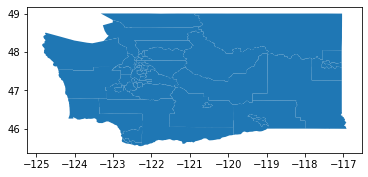

In [26]:
# Import Washington PUMA Data with GeoPandas Shape data in Geometry column 
wa_puma = gpd.read_file("../../data/raw/tl_2017_53_puma10.shp") 

# Converts PUMACE10 Column from string to integer since we are reading directly from the file and not through pandas (pandas would have done this conversion automatically)
wa_puma.loc[:,'PUMACE10'] = wa_puma['PUMACE10'].astype(int)
wa_puma.loc[:,'GEOID10'] = wa_puma['GEOID10'].astype(int)

wa_puma.plot() # can add additional code beyond this line to the object to make it prettier, but not needed right now in this stage.
plt.show() # runs the object in its whole

## __Establishing south king county parameters:__ 
We queried out a list of puma id's that based off their description we consider to be south 
 - we used the government website as a reference point: https://www.ofm.wa.gov/washington-data-research/population-demographics/gis-data/census-geographic-files/supplemental-information-gis-files/public-use-microdata-area-maps<br>
(insert picture of the sql query under this cell)

In [ ]:
# insert picture of query code here

In [93]:
# import postico query we ran to filter out the state to washington to show all of king county's puma id's 
df_puma_id = pd.read_csv('../queries/Puma_Ids.csv') 
df_puma_id.loc[8, 'puma_name']

'King County (Northeast)--Snoqualmie City, Cottage Lake, Union Hill & Novelty Hill                                                                                                                                                                                                                                                                                                                                                                                                                                   '

In [44]:
# We were able to query out all of king county's puma's and ran into an issue with further querying it by south puma names
# inside of our software so we will take just one extra step with pandas to query out our southern puma's
# we referenced a map on puma locations found on: https://www.ofm.wa.gov/washington-data-research/population-demographics/gis-data/census-geographic-files/supplemental-information-gis-files/public-use-microdata-area-maps
# to understand that some puma locations described as west, central still included south county cities.
# We included 
df_south_pumas = df_puma_id.sort_values('puma').query('puma_name.str.contains("South") and puma!= 11606 or puma==11610 or puma==11611')
df_south_pumas

,state_fips,state_name,cpuma0010,puma,geoid,gisjoin,puma_name
4,53,Washington ...,1044,11610,5311610,G53011610,"King County (Central)--Renton City, Fairwood, ..."
9,53,Washington ...,1045,11611,5311611,G53011611,"King County (West Central)--Burien, SeaTac, Tu..."
10,53,Washington ...,1046,11612,5311612,G53011612,"King County (Far Southwest)--Federal Way, Des ..."
5,53,Washington ...,1044,11613,5311613,G53011613,King County (Southwest Central)--Kent City ...
6,53,Washington ...,1044,11614,5311614,G53011614,King County (Southwest)--Auburn City & Lakelan...
7,53,Washington ...,1044,11615,5311615,G53011615,"King County (Southeast)--Maple Valley, Covingt..."


'King County (West Central)--Burien, SeaTac, Tukwila Cities & White Center                                                                                                                                                                                                                                                                                                                                                                                                                                           '

In [45]:
skc_puma_list= list(df_south_pumas.loc[:, 'puma'])
skc_puma_list

[11610, 11611, 11612, 11613, 11614, 11615]

In [109]:
# Selects all PUMA codes for King County (including Seattle) PUMAs and puts into Subset
kc_puma = wa_puma.loc[(wa_puma.PUMACE10 >= 11601 ) & (wa_puma.PUMACE10 <= 11616)]

# Creates a new column, KCS and assigns a 1 if the PUMA is in S. King Country/S. Seattle, or 0 otherwise. This is
# used to map the gray portion of the figure
skc_puma = kc_puma.assign(SKC = [1 if row in skc_puma_list else 0 for row in kc_puma['PUMACE10']])

In [110]:
skc_puma.head(2) # we will use this to allow geopandas to draw our south county border

,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,SKC
9,53,11612,5311612,"King County (Far Southwest)--Federal Way, Des ...",G6120,S,160638807,279665546,+47.4764651,-122.4271168,"POLYGON ((-122.33587 47.26382, -122.33676 47.2...",1
32,53,11616,5311616,"King County (Northeast)--Snoqualmie City, Cott...",G6120,S,2477645989,49838932,+47.5779171,-121.6433869,"POLYGON ((-121.87736 47.50068, -121.87745 47.5...",0


## The Map end product:

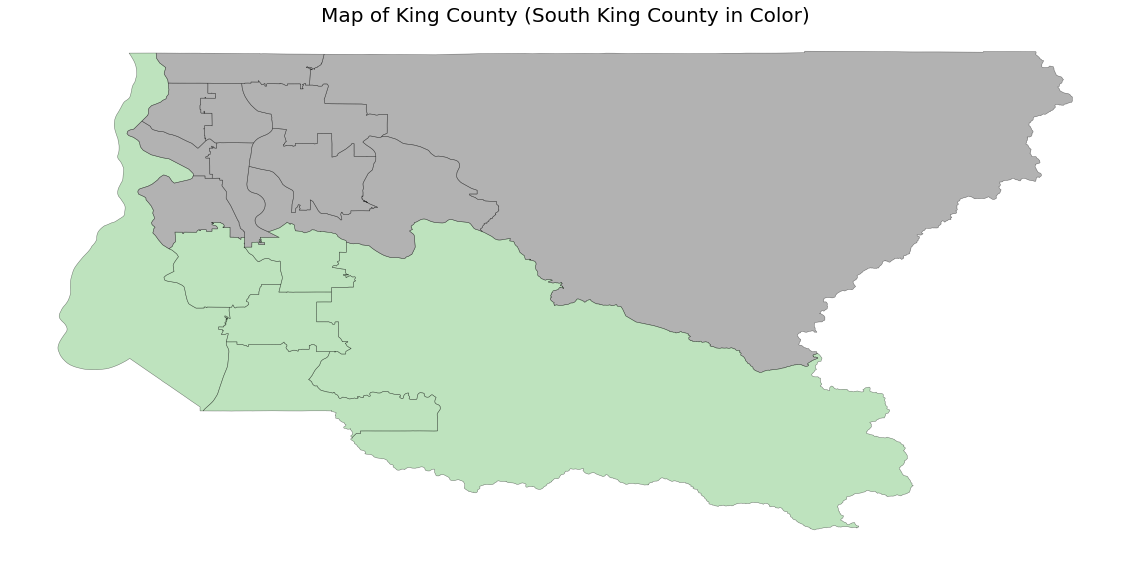

In [111]:
# Plots a map of King County, with South King County and South Seattle in color
fig, ax = plt.subplots(1, figsize=(20, 16))
ax = skc_puma.plot(ax=ax, 
              column='SKC', cmap='Accent_r', alpha = .5, linewidth=.5, edgecolor='black',  legend = False)
ax.set_title('Map of King County (South King County in Color)', fontsize = 20)
ax.set_axis_off()
fig.tight_layout
plt.show();

# Different mapping method:

In [227]:
gpd.read_file('../../data/raw/Zip_Codes.shp')

ERROR:fiona._env:Unable to open ../../data/raw/Zip_Codes.shx or ../../data/raw/Zip_Codes.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.


DriverError: Unable to open ../../data/raw/Zip_Codes.shx or ../../data/raw/Zip_Codes.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

In [ ]:
kc_zip_mean = kc.groupby('zipcode').aggregate(np.mean)
kc_zip_mean.drop(['lat', 'long'], axis=1, inplace=True)
kc_zip_mean.reset_index(inplace = True)
map_kc = gpd.read_file('../../data/raw/Zip_Codes.shp')
map_kc['zipcode'] = map_kc['ZIPCODE']
map_kc.drop(['ZIP', 'ZIPCODE', 'OBJECTID'], axis=1, inplace=True)
merged = pd.merge(map_kc, kc_zip_mean, on='zipcode')
hot_zip_codes.reset_index(inplace=True)
hot_zip_codes['zipcode']=hot_zip_codes['zipcode'].astype(str)
hot_zip_codes.drop(['lat', 'long'], axis=1, inplace=True)
hot_zip_codes
appended_data = []
for zipcode in list(kc['zipcode'].unique()):
    if zipcode not in list(hot_zip_codes['zipcode']):
        appended_data.append({'zipcode':zipcode, 'rate_of_price_increase':0})
appended_df = pd.DataFrame(data=appended_data)
merged_df = pd.concat([hot_zip_codes, appended_df], axis=0)
merged_df['zipcode'].nunique()
merged_2 = pd.merge(merged, merged_df, on='zipcode')
gdf=gpd.GeoDataFrame(merged_2, geometry=merged_2.geometry)
gdf.plot(column='rate_of_price_increase', k=5, colormap='OrRd', legend=True, figsize=(20,12))
plt.show()

# What is opportunity youth?

opportunity youth is classified as: young people between the age 16 through 24 who are disengaged from both work and school. In particular, we want these youth who are within the south county borders.<br>
To meet the guidelines of these parameters, we have run some queries on a few tables.

__Preface:__ <br>
*due to postico technical difficulties, we could not fully query out what we needed so we did what postico would allow us to do and then we will proceed to finish off the querying and cleaning in pandas.*

This was what our query syntax looked like:

(insert image of the syntax as a png file in cell below):
SELECT puma, agep, esr, sch
FROM pums_2017
WHERE puma::INT IN (11610, 11611, 11612, 11613, 11614, 11615)
AND agep::INT BETWEEN 16 AND 24
AND sch::INT = 1
AND st::INT = 53 
;


In [122]:
skc_puma_list

[11610, 11611, 11612, 11613, 11614, 11615]

In [243]:
# we read the exported sql query we made with pandas in order to query further with pandas
df_oy_no_age = pd.read_csv('../queries/pums_2017_based_on_puma.csv')
df_opportunity_youth_south_county= df_oy_no_age.query('(agep > 15 and agep < 25) and (sch == 1) and (esr == 3 or esr == 6)').loc[:, ['puma','agep','esr', 'sch']]
df_opportunity_youth_south_county['sch'].replace(1, "not in school", inplace=True)
df_opportunity_youth_south_county['esr'].replace((3,6),('unemployed','not in labor force'), inplace=True)
# need to filter esr
df_opportunity_youth_south_county.sort_values('puma')

,puma,agep,esr,sch
8161,11610,19,not in labor force,not in school
2535,11610,22,not in labor force,not in school
24768,11610,18,not in labor force,not in school
24554,11610,20,not in labor force,not in school
24241,11610,23,not in labor force,not in school
...,...,...,...,...
20980,11615,20,not in labor force,not in school
3204,11615,19,unemployed,not in school
21185,11615,24,unemployed,not in school
3059,11615,22,not in labor force,not in school


In [240]:
print('number of opportunity youth in south king county =', len(df_opportunity_youth_south_county))

number of opportunity youth in south king county = 391


# Updated Descriptive statistics on OY 2016 report

1. An update of the table “Opportunity Youth Status by Age” located on page 2 of the 2016 report “Opportunity Youth in the Road Map Project Region”; and

2. A visualization that highlights a trend between the 2016 report and current data.

In [107]:
from IPython.display import Image

Our goal is to update this table with our 2019 data:

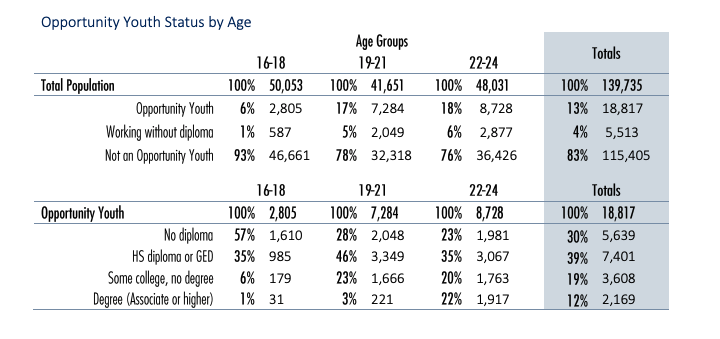

In [112]:
Image("../../img_files/OY_2016_report.png")

# Test Query and conditional

In [224]:
df_test = pd.read_csv('../queries/puma_only_filter.csv')
# filt1 = df_test['agep'] > 15
# filt2 = df_test['agep'] < 25
# filt3 = df_test['esr'] == 3
# filt4 = df_test['esr'] == 6
# filt5 = df_test['sch'] == 1
# conditions= (filt1 & filt2) & (filt3 | filt4) & filt5
# df_test[conditions].loc[:,['agep', 'esr', 'sch', 'puma']]
df_test.query('(agep>15 and agep<25) and (esr==3 or esr==6)').loc[:, ['agep', 'esr', 'sch', 'puma']]

,agep,esr,sch,puma
31,23,6.0,2.0,11612
32,19,6.0,2.0,11612
66,16,6.0,3.0,11610
75,17,3.0,2.0,11611
152,18,6.0,2.0,11615
...,...,...,...,...
34098,18,6.0,1.0,11610
34113,16,6.0,2.0,11615
34120,24,3.0,1.0,11614
34127,22,6.0,2.0,11610


In [212]:
df_test.query('agep>15 and agep<25 and esr==6').loc[:, ['agep', 'esr', 'sch', 'puma']]

,agep,esr,sch,puma
31,23,6.0,2.0,11612
32,19,6.0,2.0,11612
66,16,6.0,3.0,11610
152,18,6.0,2.0,11615
171,16,6.0,2.0,11612
...,...,...,...,...
34097,20,6.0,2.0,11610
34098,18,6.0,1.0,11610
34113,16,6.0,2.0,11615
34127,22,6.0,2.0,11610
